# Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Tamil_30k.zip (Unzipped Files)/Tamil_30k.csv")
df.count()

index              30000
website            30000
section            10428
sub_section            0
article_url        30000
title              30000
author             30000
author_link        30000
published_date     30000
hashtag            30000
article_summary        0
text               29541
image_url          30000
crawl_date         30000
Category           30000
dtype: int64

In [ ]:
df.website.value_counts()

www.toptamilnews.com    23659
ttncinema.com            6341
Name: website, dtype: int64

In [ ]:
df=df.drop(['website', 'section'	,'sub_section','article_url'	,'title'	,'author','author_link','published_date','hashtag','article_summary','image_url'	,'crawl_date'], axis=1)

In [ ]:
df.Category.value_counts()

health           9752
others           5713
entertainment    4631
crime            3785
politics         2767
sport             890
science           876
business          738
world             381
education         239
social            228
Name: Category, dtype: int64

In [ ]:
df.head()

,index,text,Category
0,0,சந்தோஷ் சிவன் இயக்கத்தில் வெளியான ‘இனம்’ திரைப...,entertainment
1,1,‘தி பேமிலி மேன்’ வெப் சீரிஸ் இரண்டாம் பாகத்தின...,entertainment
2,2,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...,crime
3,3,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...,crime
4,4,தமிழகத்தில் நாளுக்கு நாள் கொரோனா பரவல் அதிகரித...,health


In [ ]:
target_category = df['Category'].unique()
target_category

array(['entertainment', 'crime', 'health', 'others', 'sport', 'world',
       'business', 'politics', 'education', 'social', 'science'],
      dtype=object)

In [ ]:
df['categoryId'] = df['Category'].factorize()[0]
df


,index,text,Category,categoryId
0,0,சந்தோஷ் சிவன் இயக்கத்தில் வெளியான ‘இனம்’ திரைப...,entertainment,0
1,1,‘தி பேமிலி மேன்’ வெப் சீரிஸ் இரண்டாம் பாகத்தின...,entertainment,0
2,2,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...,crime,1
3,3,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...,crime,1
4,4,தமிழகத்தில் நாளுக்கு நாள் கொரோனா பரவல் அதிகரித...,health,2
...,...,...,...,...
29995,29995,பிரபல சீரியல் நடிகர் குட்டி ரமேஷ் திடீரென உயிர...,entertainment,0
29996,29996,ராம்ஜான் திருநாளையொட்டி அருண் விஜய் நடித்துள்ள...,entertainment,0
29997,29997,சந்தோஷ் சிவன் இயக்கத்தில் வெளியான ‘இனம்’ திரைப...,entertainment,0
29998,29998,‘மூடர் கூடம்’ இயக்குனர் நவீனின் பிறந்தநாளில் ப...,entertainment,0


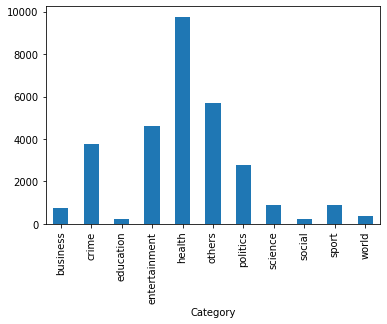

In [ ]:
df.groupby('Category').categoryId.count().plot.bar(ylim=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train1, X_test, y_train1, y_test = train_test_split(df, df.Category, stratify=df.Category, test_size=0.2,random_state=42)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_train_cv, y_train, y_train_cv = train_test_split(X_train1, y_train1, stratify=y_train1, test_size=0.2,random_state= 42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_train_cv.shape,y_train_cv.shape)
print(X_test.shape,y_test.shape)

(19200, 4) (19200,)
(4800, 4) (4800,)
(6000, 4) (6000,)


In [ ]:
from tqdm import *

class Data_cleaner:
  def Data_Cleaning(self,text):

    #text cleaning
    text=re.sub(r'(\d+)',r'',text)
    text=text.replace(u',','')
    text=text.replace(u'"','')
    text=text.replace(u'(','')
    text=text.replace(u')','')
    text=text.replace(u'"','')
    text=text.replace(u':','') 
    text=text.replace(u"'",'')
    text=text.replace(u"‘‘",'')
    text=text.replace(u"’’",'')
    text=text.replace(u"''",'')
    text=text.replace(u".",'')
    text=text.replace(u"*",'')
    text=text.replace(u"#",'')
    text=text.replace(u'"','')
    text=text.replace(u":",'')
    text=text.replace(u"|",'')
    text=text.replace(u":","")
    text=text.replace(u'"',"")
    text = re.sub('\s+',' ', text)
    #Split the sentences
    sentences=text.split(u"।")
    #print(sentences)
    #Tokenizing
    sentences_list=sentences
    tokens=[]

    for each in sentences_list:
            word_list=each.split(' ')
            tokens=tokens+word_list
    #Remove token with only space
    for tok in tokens:
        tok=tok.strip()
    #Remove hyphens in tokes
    for each in tokens:
        if '-' in each:
              tok=each.split('-')
              tokens.remove(each)
              tokens.append(tok[0])
              tokens.append(tok[1])

    tokens = [i.lower() for i in tokens]
    return tokens
  def Text_joiner(self,txt):
    lst = ' '.join(self.Data_Cleaning(txt))
    return lst

  #you need to pass the text data only
  def Structured_Data(self,sen):
      lst3 = []
      for i in tqdm(range(len(sen))):
          lst1 = self.Text_joiner(sen[i])
          lst3.append(lst1)
      return lst3

In [ ]:
X_train.loc[:,'text']=X_train.loc[:,'text'].apply(str)

In [ ]:
cl = Data_cleaner()

In [ ]:
lstt = cl.Structured_Data(X_train.text.values)

100%|██████████| 19200/19200 [00:04<00:00, 4574.91it/s]


In [ ]:
X_train['cleaned_text'] = lstt

In [ ]:

X=X_train.drop(['Category','categoryId','index'],axis=1)
X

,text,cleaned_text
28677,எதிர்வரும் ஆகஸ்ட் முதல் டிசம்பருக்குள் 216 கோட...,எதிர்வரும் ஆகஸ்ட் முதல் டிசம்பருக்குள் கோடி தட...
622,கொரோனா பரவலை மீறி கடந்த ஆண்டு துபாயில் வெற்றிக...,கொரோனா பரவலை மீறி கடந்த ஆண்டு துபாயில் வெற்றிக...
4250,தன்னை சந்திக்க வருபவர்கள் பூங்கொத்து கொடுப்பதை...,தன்னை சந்திக்க வருபவர்கள் பூங்கொத்து கொடுப்பதை...
1100,"தமிழ்நாடு முழுவதும் அரசு மருத்துவமனைகளிலும், த...",தமிழ்நாடு முழுவதும் அரசு மருத்துவமனைகளிலும் தன...
22013,கிருஷ்ணகிரி கிருஷ்ணகிரி அருகே கடன் தொல்லையால் ...,கிருஷ்ணகிரி கிருஷ்ணகிரி அருகே கடன் தொல்லையால் ...
...,...,...
6631,"கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும், ...",கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும் அ...
13413,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...
29835,மதுரை யாதவர் கல்லூரியில் சித்த மருத்துவ சிகிச்...,மதுரை யாதவர் கல்லூரியில் சித்த மருத்துவ சிகிச்...
9417,கள்ளக்குறிச்சி கள்ளக்குறிச்சி அருகே கள்ளக்காதல...,கள்ளக்குறிச்சி கள்ளக்குறிச்சி அருகே கள்ளக்காதல...


In [ ]:
X_train['cleaned_text'] = lstt
X_train

,index,text,Category,categoryId,cleaned_text
28677,28677,எதிர்வரும் ஆகஸ்ட் முதல் டிசம்பருக்குள் 216 கோட...,politics,7,எதிர்வரும் ஆகஸ்ட் முதல் டிசம்பருக்குள் கோடி தட...
622,622,கொரோனா பரவலை மீறி கடந்த ஆண்டு துபாயில் வெற்றிக...,sport,4,கொரோனா பரவலை மீறி கடந்த ஆண்டு துபாயில் வெற்றிக...
4250,4250,தன்னை சந்திக்க வருபவர்கள் பூங்கொத்து கொடுப்பதை...,politics,7,தன்னை சந்திக்க வருபவர்கள் பூங்கொத்து கொடுப்பதை...
1100,1100,"தமிழ்நாடு முழுவதும் அரசு மருத்துவமனைகளிலும், த...",health,2,தமிழ்நாடு முழுவதும் அரசு மருத்துவமனைகளிலும் தன...
22013,22013,கிருஷ்ணகிரி கிருஷ்ணகிரி அருகே கடன் தொல்லையால் ...,crime,1,கிருஷ்ணகிரி கிருஷ்ணகிரி அருகே கடன் தொல்லையால் ...
...,...,...,...,...,...
6631,6631,"கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும், ...",health,2,கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும் அ...
13413,13413,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...,politics,7,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...
29835,29835,மதுரை யாதவர் கல்லூரியில் சித்த மருத்துவ சிகிச்...,health,2,மதுரை யாதவர் கல்லூரியில் சித்த மருத்துவ சிகிச்...
9417,9417,கள்ளக்குறிச்சி கள்ளக்குறிச்சி அருகே கள்ளக்காதல...,crime,1,கள்ளக்குறிச்சி கள்ளக்குறிச்சி அருகே கள்ளக்காதல...


In [ ]:
X_train_cv.loc[:,'text']=X_train_cv.loc[:,'text'].apply(str)

In [ ]:
d_cv = cl.Structured_Data(X_train_cv.text.values)

100%|██████████| 4800/4800 [00:01<00:00, 4452.65it/s]


In [ ]:
X_train_cv.loc[:,"cleaned_text"] = d_cv

In [ ]:

X_train_cv.head()

,index,text,Category,categoryId,cleaned_text
10011,10011,திருச்சி திருச்சி அருகே மகள் காதல் திருமணம் செ...,crime,1,திருச்சி திருச்சி அருகே மகள் காதல் திருமணம் செ...
3551,3551,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...,politics,7,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...
8466,8466,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...,crime,1,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...
29816,29816,"கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும், ...",health,2,கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும் அ...
2091,2091,“கொரோனா தடுப்பு பணிகளுக்காக திமுக எம்.எல்.ஏக்க...,health,2,“கொரோனா தடுப்பு பணிகளுக்காக திமுக எம்எல்ஏக்கள்...


In [ ]:
X_train_cv["cleaned_text"] = d_cv

In [ ]:
X_train_cv

,index,text,Category,categoryId,cleaned_text
10011,10011,திருச்சி திருச்சி அருகே மகள் காதல் திருமணம் செ...,crime,1,திருச்சி திருச்சி அருகே மகள் காதல் திருமணம் செ...
3551,3551,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...,politics,7,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...
8466,8466,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...,crime,1,தூத்துக்குடி தூத்துக்குடி மாவட்டம் விளாத்திகுள...
29816,29816,"கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும், ...",health,2,கொரோனா இரண்டாவது அலையில் சினிமா பிரபலங்களும் அ...
2091,2091,“கொரோனா தடுப்பு பணிகளுக்காக திமுக எம்.எல்.ஏக்க...,health,2,“கொரோனா தடுப்பு பணிகளுக்காக திமுக எம்எல்ஏக்கள்...
...,...,...,...,...,...
9532,9532,கருப்பின சர்ச்சை விவகாரத்தில் தனது அளிக்கப்பட்...,entertainment,0,கருப்பின சர்ச்சை விவகாரத்தில் தனது அளிக்கப்பட்...
19134,19134,அசைவ உணவு பிரியர்களே !! உங்களுக்கு முட்டை குழம...,others,3,அசைவ உணவு பிரியர்களே !! உங்களுக்கு முட்டை குழம...
18781,18781,இன்று உங்கள் பேச்சில் பதட்டமும் வேதனையும் பிரத...,others,3,இன்று உங்கள் பேச்சில் பதட்டமும் வேதனையும் பிரத...
10722,10722,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...,health,2,சட்டமன்ற தேர்தலில் திமுக வெற்றி பெற்றதையடுத்து...


In [ ]:
X_test.loc[:,'text']=X_test.loc[:,'text'].apply(str)

In [ ]:
d_test = cl.Structured_Data(X_test.text.values)

100%|██████████| 6000/6000 [00:01<00:00, 4692.01it/s]


In [ ]:
X_test["cleaned_text"] = d_test

In [ ]:
X_test = X_test.drop(columns=["cleaned_text"])

In [ ]:
X_test["cleaned_text"] = d_test

In [ ]:
X_train = X_train[X_train["Category"]!='others']

In [ ]:
X_train_cv= X_train_cv[X_train_cv["Category"]!='others']

In [ ]:
X_test = X_test[X_test["Category"]!='others']


In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec = vec.fit(X_train['cleaned_text'])
X_train_bow = vec.transform(X_train['cleaned_text'])
X_train_cv_bow = vec.transform(X_train_cv['text'])
X_test_bow = vec.transform(X_test['cleaned_text'])


In [ ]:
print(X_train_bow.shape)
print(X_train_cv_bow.shape)
print(X_test_bow.shape)

(15544, 1222)
(3886, 1222)
(4857, 1222)


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc_labels = LabelEncoder()
X_train.loc[:, "Category"] = enc_labels.fit_transform(X_train["Category"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc_labels1 = LabelEncoder()
X_train_cv.loc[:, "Category"] = enc_labels1.fit_transform(X_train_cv["Category"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc_labels2 = LabelEncoder()
X_test.loc[:, "Category"] = enc_labels2.fit_transform(X_test["Category"])

In [ ]:
y_train_label = np.array(list(X_train['Category']))
y_train_cv_label = np.array(list(X_train_cv['Category']))
y_test_label = np.array(list(X_test['Category']))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Importing Multinomial naive Bayes
from sklearn.naive_bayes import MultinomialNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
clf = MultinomialNB()
alpha_range = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
clf_Cross = GridSearchCV(clf ,param_grid = alpha_range ,scoring='neg_log_loss',cv=5,return_train_score=True)
clf_Cross.fit(X_train_bow,y_train_label)

clf_Cross.best_params_


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='neg_log_loss')

{'alpha': 1e-05}

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
nv_clf = MultinomialNB(alpha=1)
nv_clf.fit(X_train_bow, y_train_label)
sig_clf = CalibratedClassifierCV(nv_clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train_label)

MultinomialNB(alpha=1)

CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=1))

In [ ]:

predict_y = sig_clf.predict_proba(X_train_bow)
predict_acc = nv_clf.predict(X_train_bow)
train_acc= accuracy_score(y_train_label, predict_acc)
print('For alpha = ', 1, "The train accuracy is:",train_acc)
print("**************************************************************************************")
predict_y = sig_clf.predict_proba(X_train_cv_bow)
predict_acc = nv_clf.predict(X_train_cv_bow)
print('For alpha = ', 1, "The cv accuracy is:",accuracy_score(y_train_cv_label, predict_acc))
print("**************************************************************************************")
predict_y = sig_clf.predict_proba(X_test_bow)
predict_acc = nv_clf.predict(X_test_bow)
print('For alpha = ', 1, "The test accuracy is:",accuracy_score(y_test_label, predict_acc))

For alpha =  1 The train accuracy is: 0.9904143077714874
**************************************************************************************
For alpha =  1 The cv accuracy is: 0.9902213072568193
**************************************************************************************
For alpha =  1 The test accuracy is: 0.9911467984352481


In [ ]:

print(classification_report(test_predict, Y_test, target_names=target_category))

               precision    recall  f1-score   support

entertainment       1.00      1.00      1.00       221
        crime       1.00      1.00      1.00      1136
       health       1.00      1.00      1.00        72
       others       0.95      0.95      0.95      1398
        sport       1.00      0.96      0.98      3061
        world       0.91      0.98      0.95      1600
     business       0.91      0.95      0.93       800
     politics       1.00      1.00      1.00       263
    education       1.00      1.00      1.00        68
       social       1.00      1.00      1.00       267
      science       1.00      1.00      1.00       114

     accuracy                           0.97      9000
    macro avg       0.98      0.98      0.98      9000
 weighted avg       0.97      0.97      0.97      9000



In [ ]:

cm = confusion_matrix(Y_test, y_pred)


In [ ]:
cm

array([[ 221,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1136,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   72,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1325,   64,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2926,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,   73,   33, 1566,   42,    0,    0,    0,    0],
       [   0,    0,    0,    0,   38,   34,  758,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  263,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   68,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  267,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  114]])

Text(0.5, 15.0, 'predicted labels')

Text(91.68, 0.5, 'true labels')

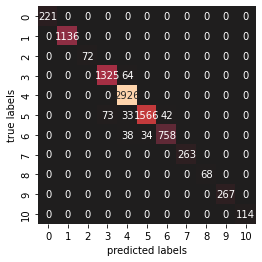

In [ ]:

#plotting heatmap of confusion matrix
sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=False,center=0)

plt.xlabel("predicted labels")
plt.ylabel("true labels")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


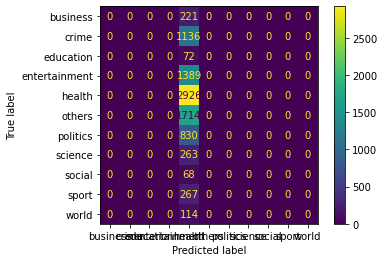

In [ ]:
from sklearn.metrics import  plot_confusion_matrix
disp=plot_confusion_matrix(nb,y_pred, Y_test)

In [ ]:
#testing
txt=["""பிளஸ் 2 தேர்வு ரத்துக்குள் ஒளிந்திருக்கும் ஆபத்துகள். சிபிஎஸ்இ மாணவர்களுக்கான 12ஆம் வகுப்புத் தேர்வை ரத்துசெய்யும் முடிவை ஒன்றிய அரசு எடுத்திருக்கிறது. விரைவில் இது குறித்து முடிவெடுங்கள் என்று உச்ச நீதிமன்றம் கூறுயதையடுத்துப் பிரதமர் நரேந்திர மோடியின் தலைமையில் நடந்த கூட்டத்தில் இந்த முடிவு எடுக்கப்பட்டிருக்கிறது. சிபிஎஸ்இ தேர்வு ரத்து அறிவிப்பைப் பின்பற்றி தமிழக அரசும் அதே முடிவை எடுக்கும் என்ற கருத்து பரவலாக இருந்துவருகிறது. """]

In [ ]:
txt1=["""ராஜமௌலியின் ‘ஆர்.ஆர்.ஆர்’ டிரெய்லர் எப்போது ?.. கசிந்தது புதிய தகவல். ராஜமௌலியின் பிரம்மாண்ட இயக்கத்தில் உருவாகி வருகிறது  ‘ஆர்.ஆர்.ஆர்’. சுதந்திர போராட்ட வீரர்களான சீதராமராஜு, கொமராம்பீம் ஆகியோர் வாழ்க்கையை மையமாக வைத்து இப்படம் உருவாகி வருகிறது. மிகுந்த எதிர்பார்ப்பை ஏற்படுத்தியுள்ள இப்படத்தில் ராம் சரண் மற்றும் ஜூனியர் என்.டி.ஆர் ஆகியோர் இணைந்து நடித்துள்ளனர். """]

In [ ]:
#Prediction for first article
cln=cl.Structured_Data(txt)
vect=vec.transform(cln)
sig_clf.predict(vect)
enc_labels.inverse_transform([8])

100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]


array([4])

array(['sport'], dtype=object)

In [ ]:
#prediction for second article
cln=cl.Structured_Data(txt1)
vect1=vec.transform(cln)
sig_clf.predict(vect1)
enc_labels.inverse_transform([3])

100%|██████████| 1/1 [00:00<00:00, 2361.66it/s]


array([3])

array(['entertainment'], dtype=object)

In [ ]:
from keras.layers import SpatialDropout1D

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.feature_selection import RFE
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
df.loc[:,'text']=df.loc[:,'text'].apply(str)
cl = Data_cleaner()
lstt = cl.Structured_Data(df.text.values)
df['cleaned_text'] = lstt
X_train, X_test, Y_train, Y_test = train_test_split(df.cleaned_text,df.Category, test_size = 0.3, random_state = 60,shuffle=True, stratify=df.Category)
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

from sklearn.metrics import confusion_matrix

classifier=nb.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)


100%|██████████| 30000/30000 [00:06<00:00, 4716.41it/s]


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])